# FACE MASK DETECTION ALERT SYSTEM 

In [ ]:
     # Mount the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setting Directory Path for Dataset
import os
Dataset='/content/drive/MyDrive/Face-Mask- Detection/dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['with_mask', 'without_mask']


# Importing Required Libraries

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112, 112

images = []
labels = []

for category in Data_Dir:
    folder_path = os.path.join('/content/drive/MyDrive/Face-Mask- Detection/dataset', category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)

        try:
            #Coverting the image into gray scale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            #resizing the gray scaled image into size 56x56 in order to keep size of the images consistent           
            resized_img=cv2.resize(grayscale_img,(img_rows, img_cols))
            images.append(resized_img)
            labels.append(category)
        # Exception Handling in case any error occurs
        except Exception as e:
            print('Exception:',e)
        
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows, img_cols,1))


# Perform one hot encoding on the labels since the label are in textual form
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, 
                                                      random_state=0)


# Convolutional Neural Network (CNN)

In [ ]:
# Import Necessary Keras Libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

# Define model paramters
num_classes = 2
batch_size = 32

# Build CNN model using Sequential API
model=Sequential()

#First layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten and Dropout Layer to stack the output convolutions above as well as cater overfitting
model.add(Flatten())
model.add(Dropout(0.5))

# Softmax Classifier
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 64)      640       
_________________________________________________________________
activation_4 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_5 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 86528)            

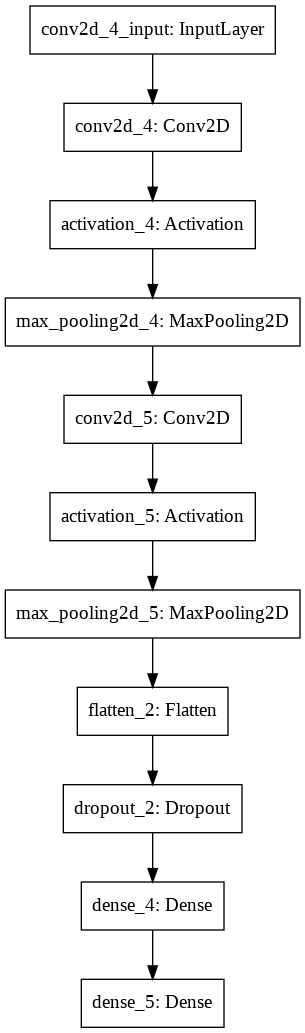

In [ ]:
# Plot the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architecture.png')

In [ ]:
## Train the Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam 

epochs = 50

model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])

fitted_model = model.fit(train_X,train_y,epochs = epochs,validation_split=0.2)


Epoch 1/50
72/72 [==============================] - 34s 66ms/step - loss: 0.5920 - accuracy: 0.6829 - val_loss: 0.4440 - val_accuracy: 0.8087
Epoch 2/50
72/72 [==============================] - 4s 55ms/step - loss: 0.3853 - accuracy: 0.8260 - val_loss: 0.3736 - val_accuracy: 0.8330
Epoch 3/50
72/72 [==============================] - 4s 55ms/step - loss: 0.3221 - accuracy: 0.8573 - val_loss: 0.4080 - val_accuracy: 0.8313
Epoch 4/50
72/72 [==============================] - 4s 55ms/step - loss: 0.2644 - accuracy: 0.8913 - val_loss: 0.3463 - val_accuracy: 0.8626
Epoch 5/50
72/72 [==============================] - 4s 55ms/step - loss: 0.1905 - accuracy: 0.9221 - val_loss: 0.3792 - val_accuracy: 0.8643
Epoch 6/50
72/72 [==============================] - 4s 56ms/step - loss: 0.1418 - accuracy: 0.9435 - val_loss: 0.3710 - val_accuracy: 0.8800
Epoch 7/50
72/72 [==============================] - 4s 56ms/step - loss: 0.1262 - accuracy: 0.9495 - val_loss: 0.3573 - val_accuracy: 0.8817
Epoch 8/50
7

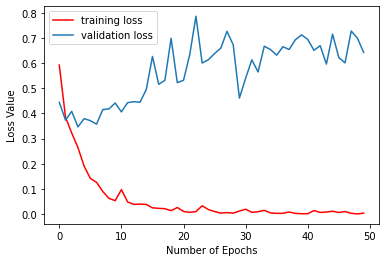

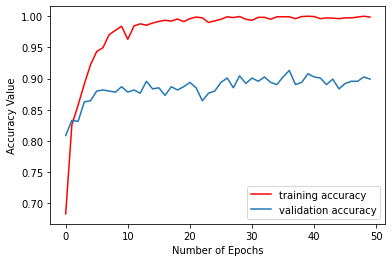

In [ ]:
## Plot the Training Loss & Accuracy

from matplotlib import pyplot as plt
# Plot Training and Validation Loss
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [ ]:
# Save or Serialize the model with the name face_mask_detection_alert_system
model.save('face_mask_detection_alert_system.h5')